## Charge Zone Utilization Trends April 2023

### by Janvi Nerurkar for ExperiencesWithEVs

### Data Preparation and Cleaning

#### Importing packages

In [1]:
import numpy as np
import pandas as pd
from skimage import io
import cv2
import seaborn as sb
import matplotlib.pyplot as mp
import datetime as dt
import csv

#### Reading heatmap image

In [2]:
heatmap = cv2.imread('heatmap.jpeg',1)
heatmap.shape #image dimensions: H, W, BGR

(420, 800, 3)

#### Adding relevant measures

In [3]:
h = heatmap.shape[0] #height of image
w = heatmap.shape[1] #width of image
offset_y = (31, 27) #distance from top & bottom of image to heatmap
offset_x = (36, 73) #distance from left & right of image to heatmap
cell_size = (23, 15) #dimensions of each cell in heatmap

#### Creating threshold image with pixel colors in BGR format

In [4]:
def read_as_digital(heatmap, cell_size, offset_x, offset_y):
    results = []
    for y in range(offset_y[0], h - offset_y[1] - cell_size[1], cell_size[1]):
       row = []
       for x in range(offset_x[0], w - offset_x[1] - cell_size[0], cell_size[0]):
            row.append(heatmap[y + int(cell_size[1]/2), x + int(cell_size[0]/2)])
       results.append(row)
    return results

#### Extracting pixel color data from heatmap

In [5]:
colors = pd.DataFrame(read_as_digital(heatmap, cell_size, offset_x, offset_y))
colors.columns = [x for x in range(1, len(colors.columns)+1)] #Changing to reflect April 1-30
colors.reset_index(inplace=True)
colors = colors.rename(columns = {'index':'Hour'})
colors.head()

,Hour,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0,"[148, 225, 187]","[143, 216, 170]","[161, 232, 206]","[161, 235, 207]","[127, 204, 147]","[160, 234, 210]","[171, 239, 222]","[175, 241, 222]","[129, 199, 146]",...,"[144, 211, 172]","[162, 236, 212]","[167, 237, 214]","[132, 201, 144]","[157, 227, 204]","[165, 239, 221]","[174, 237, 221]","[180, 245, 230]","[154, 224, 194]","[124, 195, 138]"
1,1,"[155, 225, 189]","[169, 237, 214]","[175, 234, 219]","[160, 230, 200]","[162, 233, 207]","[165, 231, 212]","[174, 236, 220]","[114, 185, 118]","[159, 227, 196]",...,"[174, 237, 221]","[174, 239, 223]","[178, 243, 227]","[160, 229, 202]","[138, 206, 153]","[159, 224, 198]","[116, 187, 124]","[154, 224, 193]","[141, 206, 161]","[168, 238, 215]"
2,2,"[154, 224, 187]","[179, 241, 229]","[174, 234, 216]","[165, 234, 213]","[170, 228, 203]","[140, 205, 156]","[167, 232, 206]","[171, 238, 217]","[173, 238, 222]",...,"[173, 238, 217]","[176, 241, 225]","[160, 231, 205]","[176, 239, 223]","[165, 230, 204]","[174, 237, 217]","[162, 233, 207]","[174, 236, 218]","[178, 240, 226]","[172, 239, 224]"
3,3,"[164, 235, 208]","[164, 232, 207]","[180, 239, 225]","[181, 238, 223]","[162, 230, 205]","[181, 243, 231]","[181, 240, 226]","[177, 239, 225]","[165, 235, 212]",...,"[169, 237, 214]","[84, 151, 84]","[170, 238, 221]","[174, 239, 218]","[152, 222, 191]","[181, 243, 229]","[175, 239, 227]","[177, 242, 226]","[108, 177, 110]","[156, 226, 196]"
4,4,"[171, 237, 218]","[174, 240, 221]","[163, 227, 197]","[171, 238, 217]","[172, 241, 221]","[175, 241, 222]","[175, 237, 221]","[177, 242, 226]","[177, 242, 227]",...,"[173, 237, 218]","[148, 218, 177]","[168, 237, 216]","[156, 223, 192]","[179, 243, 231]","[177, 239, 225]","[179, 241, 227]","[171, 236, 220]","[177, 242, 227]","[175, 239, 227]"


In [6]:
colors_2d = colors.melt(id_vars = ["Hour"], var_name = "Date", value_name = "Colors")
colors_2d[['B','G','R']] = pd.DataFrame(colors_2d.Colors.tolist(), index= colors_2d.index)
colors_2d.head()

,Hour,Date,Colors,B,G,R
0,0,1,"[148, 225, 187]",148,225,187
1,1,1,"[155, 225, 189]",155,225,189
2,2,1,"[154, 224, 187]",154,224,187
3,3,1,"[164, 235, 208]",164,235,208
4,4,1,"[171, 237, 218]",171,237,218


#### Repeating the process for the legend

In [7]:
l_offset_y = (40, 260) #distance from top & bottom of image to heatmap
l_offset_x = (737, 52) #distance from left & right of image to heatmap
l_cell_size = (10, 11) #dimensions of each cell in heatmap
l_start = 0
l_end = 500

In [8]:
l_colors = pd.DataFrame(read_as_digital(heatmap, l_cell_size, l_offset_x, l_offset_y))
l_colors['Unit_Consumption'] = [x for x in range(500, 49, -50)] #Changing to reflect unit consumption
l_colors = l_colors.rename(columns = {0:'Colors'})
l_colors.loc[len(l_colors.index)] = [[255, 255, 255],0] 
l_colors[['B','G','R']] = pd.DataFrame(l_colors.Colors.tolist(), index= l_colors.index)
print(l_colors)

             Colors  Unit_Consumption    B    G    R
0     [60, 100, 45]               500   60  100   45
1     [67, 119, 59]               450   67  119   59
2     [74, 132, 67]               400   74  132   67
3     [92, 154, 88]               350   92  154   88
4    [99, 168, 101]               300   99  168  101
5   [116, 186, 123]               250  116  186  123
6   [135, 203, 146]               200  135  203  146
7   [141, 207, 165]               150  141  207  165
8   [154, 224, 188]               100  154  224  188
9   [162, 232, 209]                50  162  232  209
10  [255, 255, 255]                 0  255  255  255


#### Estimating heatmap cell values based on legend

In [9]:
heatmap_data = pd.merge_asof(colors_2d.sort_values('G'), l_colors.sort_values('G'), on = 'G', direction = 'nearest')
heatmap_data.head(10)

,Hour,Date,Colors_x,B_x,G,R_x,Colors_y,Unit_Consumption,B_y,R_y
0,11,29,"[53, 96, 39]",53,96,39,"[60, 100, 45]",500,60,45
1,17,26,"[59, 104, 48]",59,104,48,"[60, 100, 45]",500,60,45
2,17,21,"[62, 110, 51]",62,110,51,"[67, 119, 59]",450,67,59
3,23,6,"[63, 115, 51]",63,115,51,"[67, 119, 59]",450,67,59
4,18,23,"[67, 116, 54]",67,116,54,"[67, 119, 59]",450,67,59
5,8,15,"[69, 121, 61]",69,121,61,"[67, 119, 59]",450,67,59
6,9,7,"[75, 127, 63]",75,127,63,"[74, 132, 67]",400,74,67
7,10,15,"[73, 129, 58]",73,129,58,"[74, 132, 67]",400,74,67
8,17,20,"[72, 129, 66]",72,129,66,"[74, 132, 67]",400,74,67
9,20,7,"[73, 131, 66]",73,131,66,"[74, 132, 67]",400,74,67


In [10]:
heatmap_data = heatmap_data[['Date', 'Hour', 'Unit_Consumption']].sort_values(by = ['Date', 'Hour']).reset_index(drop=True)
heatmap_data['Time'] = colors_2d['Hour'].astype(str) + ':00'
heatmap_data.head(10)

,Date,Hour,Unit_Consumption,Time
0,1,0,100,0:00
1,1,1,100,1:00
2,1,2,100,2:00
3,1,3,50,3:00
4,1,4,50,4:00
5,1,5,50,5:00
6,1,6,50,6:00
7,1,7,50,7:00
8,1,8,150,8:00
9,1,9,50,9:00


#### Checking for accuracy by rebuilding heatmap using extracted data

In [11]:
heatmap_pivot = pd.pivot_table(heatmap_data, values = ['Unit_Consumption'], index = ['Hour'], columns = ['Date'], aggfunc = np.mean).droplevel(0, axis=1) 
heatmap_pivot.head()

Date,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
Hour,,,,,,,,,,,,,,,,,,,,,
0,100,100,50,50,200,50,50,50,200,50,...,150,50,50,200,100,50,50,0,100,200
1,100,50,50,50,50,50,50,250,100,50,...,50,50,50,50,150,100,250,100,150,50
2,100,50,50,50,100,200,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
3,50,50,50,50,50,50,50,50,50,50,...,50,350,50,50,100,50,50,50,300,100
4,50,50,100,50,50,50,50,50,50,50,...,50,100,50,100,50,50,50,50,50,50


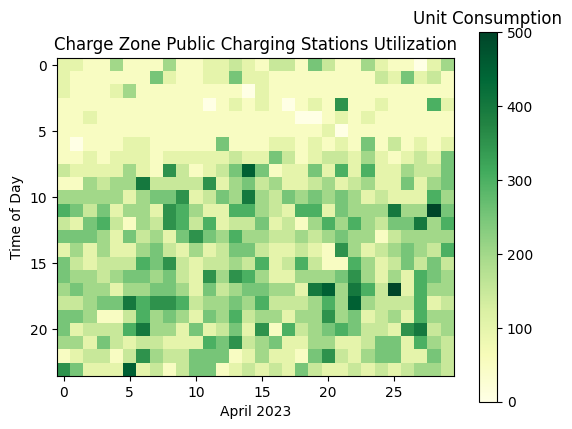

In [12]:
mp.imshow(heatmap_pivot, cmap = 'YlGn', interpolation='nearest')
mp.colorbar().ax.set_title("Unit Consumption")
mp.title("Charge Zone Public Charging Stations Utilization")
mp.xlabel("April 2023")
mp.ylabel("Time of Day")
mp.show()

## Exploratory Data Analysis

In [13]:
heatmap_data['Full_Date'] = pd.to_datetime(dict(year = 2023, month = 4, day = heatmap_data.Date))
heatmap_data['Day_of_Week_Num'] = heatmap_data.Full_Date.dt.weekday
heatmap_data['Day_of_Week'] = heatmap_data.Full_Date.dt.day_name()
heatmap_data['Weekend'] = ['Y' if d >=5 else 'N' for d in heatmap_data['Day_of_Week_Num']]
heatmap_data['Holiday'] = ['Y' if d in [1,6,14,22,29] else 'N' for d in heatmap_data['Date']]
heatmap_data['AM_PM'] = ['AM' if t < 12 else 'PM' for t in heatmap_data['Hour']]
heatmap_data['Time_of_Day'] = np.where(heatmap_data['Hour'] < 6, 'Late_Night', 
                                 np.where(heatmap_data['Hour'] < 12, 'Morning',
                                         np.where(heatmap_data['Hour'] < 18, 'Afternoon', 'Night')))

heatmap_data.head(10)

,Date,Hour,Unit_Consumption,Time,Full_Date,Day_of_Week_Num,Day_of_Week,Weekend,Holiday,AM_PM,Time_of_Day
0,1,0,100,0:00,2023-04-01,5,Saturday,Y,Y,AM,Late_Night
1,1,1,100,1:00,2023-04-01,5,Saturday,Y,Y,AM,Late_Night
2,1,2,100,2:00,2023-04-01,5,Saturday,Y,Y,AM,Late_Night
3,1,3,50,3:00,2023-04-01,5,Saturday,Y,Y,AM,Late_Night
4,1,4,50,4:00,2023-04-01,5,Saturday,Y,Y,AM,Late_Night
5,1,5,50,5:00,2023-04-01,5,Saturday,Y,Y,AM,Late_Night
6,1,6,50,6:00,2023-04-01,5,Saturday,Y,Y,AM,Morning
7,1,7,50,7:00,2023-04-01,5,Saturday,Y,Y,AM,Morning
8,1,8,150,8:00,2023-04-01,5,Saturday,Y,Y,AM,Morning
9,1,9,50,9:00,2023-04-01,5,Saturday,Y,Y,AM,Morning


#### Exporting data to CSV

In [14]:
# heatmap_data.to_csv('heatmap_data.csv')

#### By Date

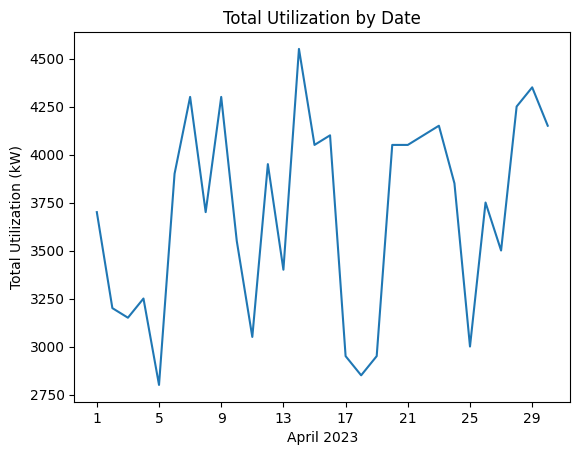

In [64]:
pivot0a = heatmap_data.pivot_table(index = 'Date', values = 'Unit_Consumption' , aggfunc = 'sum').fillna(0).astype(int)
pivot0a.plot(title = 'Total Utilization by Date', xlabel = 'April 2023', ylabel = 'Total Utilization (kW)')
mp.xticks(range(1, 31, 4))
mp.legend().remove()
mp.savefig("cz_0a.jpg")
mp.show()

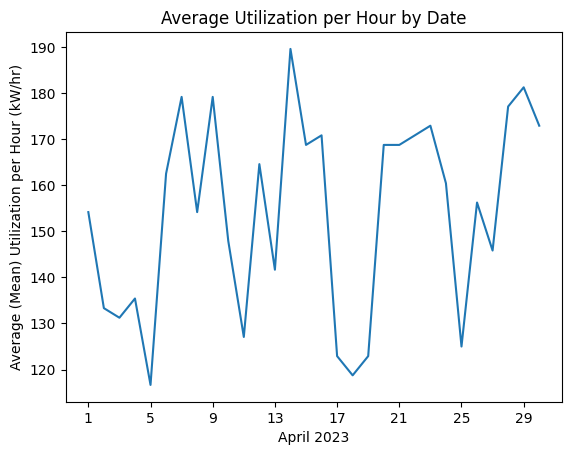

In [73]:
pivot0c = heatmap_data.pivot_table(index = 'Date', values = 'Unit_Consumption' , aggfunc = 'mean').fillna(0).round(2)
pivot0c.plot(title = 'Average Utilization per Hour by Date', xlabel = 'April 2023', ylabel = 'Average (Mean) Utilization per Hour (kW/hr)')
mp.xticks(range(1, 31, 4))
mp.legend().remove()
mp.savefig("cz_0c.jpg")
mp.show()

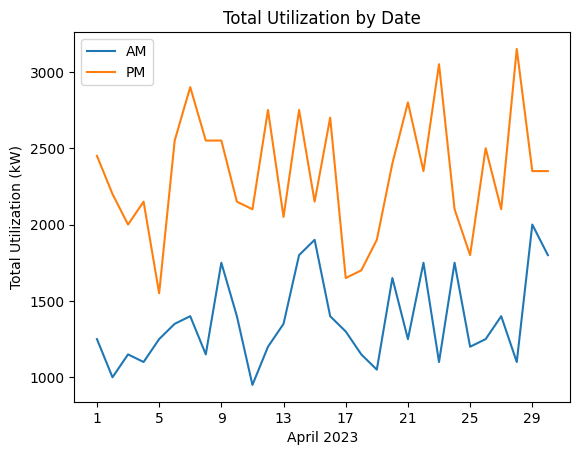

In [67]:
pivot1a = heatmap_data.pivot_table(index = 'Date', columns = 'AM_PM', values = 'Unit_Consumption' , aggfunc = 'sum').fillna(0).astype(int)
pivot1a.plot(title = 'Total Utilization by Date', xlabel = 'April 2023', ylabel = 'Total Utilization (kW)')
mp.xticks(range(1, 31, 4))
mp.legend(title = '')
mp.savefig("cz_1a.jpg")
mp.show()

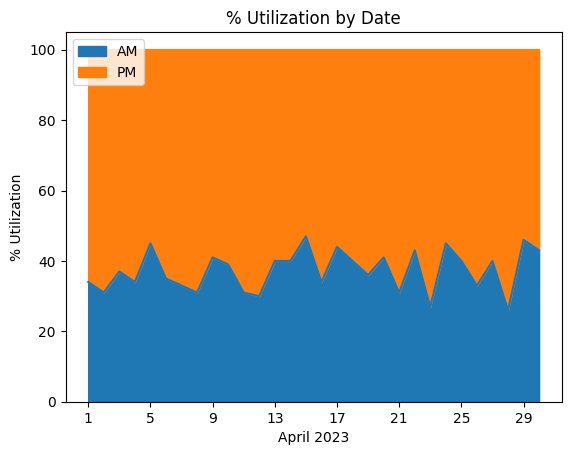

In [68]:
pivot1b = pivot1a.div(pivot1a.sum(axis=1), axis=0).round(2)
pivot1b.plot.area(stacked = True, title = '% Utilization by Date', xlabel = 'April 2023', ylabel = '% Utilization')
mp.xticks(range(1, 31, 4))
mp.yticks(np.arange(0, 1.1, step=0.2), ('0','20','40','60','80','100'))
mp.legend(title = '', loc = 2)
mp.savefig("cz_1b.jpg")
mp.show()

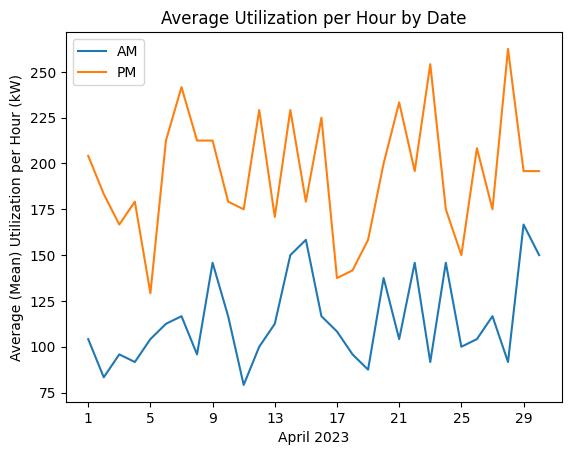

In [69]:
pivot1c = heatmap_data.pivot_table(index = 'Date', columns = 'AM_PM', values = 'Unit_Consumption' , aggfunc = 'mean').fillna(0).round(2)
pivot1c.plot(title = 'Average Utilization per Hour by Date', xlabel = 'April 2023', ylabel = 'Average (Mean) Utilization per Hour (kW)')
mp.xticks(range(1, 31, 4))
mp.legend(title = '')
mp.savefig("cz_1c.jpg")
mp.show()

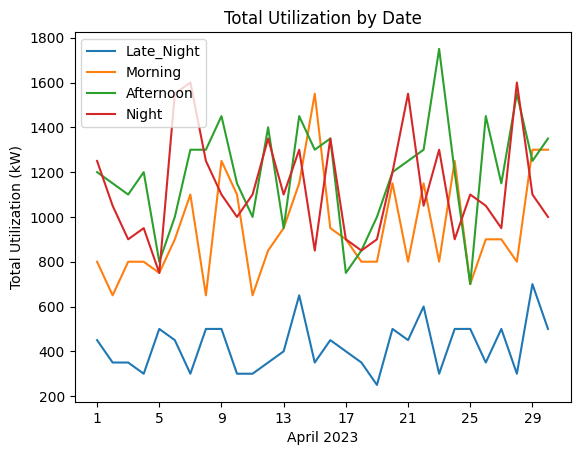

In [70]:
pivot2a = heatmap_data.pivot_table(index = 'Date', columns = 'Time_of_Day', values = 'Unit_Consumption' , aggfunc = 'sum').fillna(0).astype(int)
pivot2a = pivot2a[['Late_Night', 'Morning', 'Afternoon', 'Night']]
pivot2a.plot(title = 'Total Utilization by Date', xlabel = 'April 2023', ylabel = 'Total Utilization (kW)')
mp.xticks(range(1, 31, 4))
mp.legend(title = '')
mp.savefig("cz_2a.jpg")
mp.show()

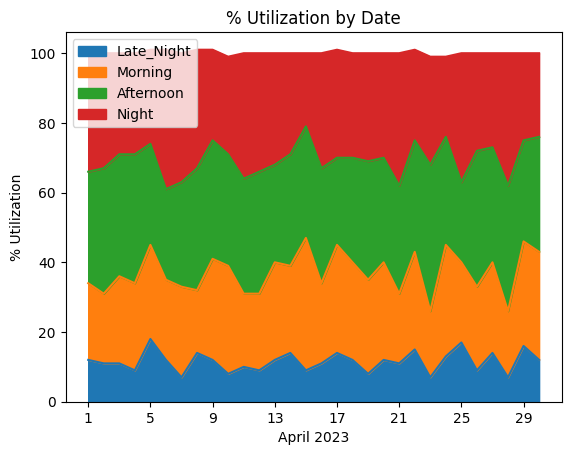

In [49]:
pivot2b = pivot2a.div(pivot2a.sum(axis=1), axis=0).round(2)
pivot2b.plot.area(stacked = True, title = '% Utilization by Date', xlabel = 'April 2023', ylabel = '% Utilization')
mp.xticks(range(1, 31, 4))
mp.yticks(np.arange(0, 1.1, step=0.2), ('0','20','40','60','80','100'))
mp.legend(title = '', loc = 2)
mp.savefig("cz_2b.jpg")
mp.show()

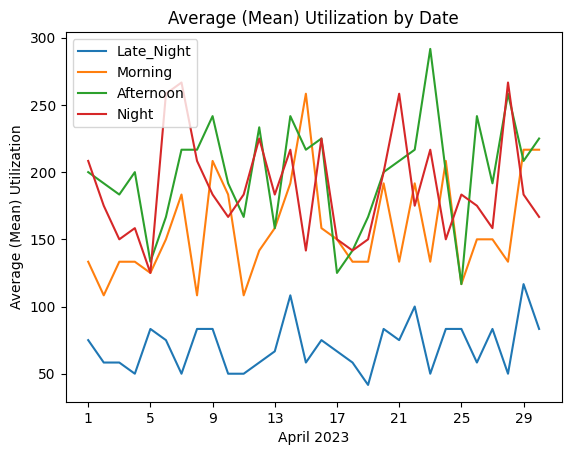

In [52]:
pivot2c = heatmap_data.pivot_table(index = 'Date', columns = 'Time_of_Day', values = 'Unit_Consumption' , aggfunc = 'mean').fillna(0).round(2)
pivot2c = pivot2c[['Late_Night', 'Morning', 'Afternoon', 'Night']]
pivot2c.plot(title = 'Average (Mean) Utilization by Date', xlabel = 'April 2023', ylabel = 'Average (Mean) Utilization (kW)')
mp.xticks(range(1, 31, 4))
mp.legend(title = '')
# mp.savefig("cz_2c.jpg")
mp.show()

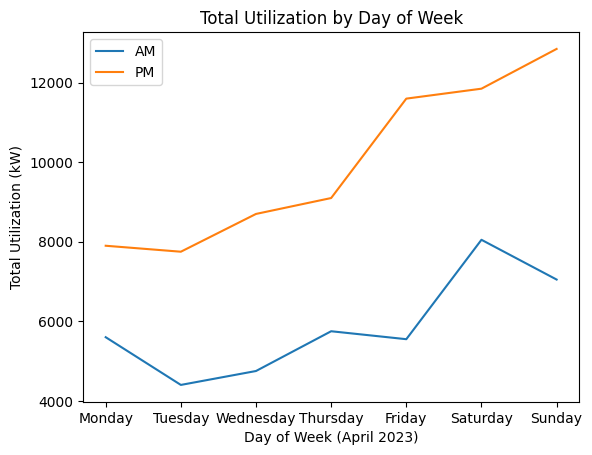

In [71]:
pivot3a = heatmap_data.pivot_table(index = 'Day_of_Week', columns = 'AM_PM', values = 'Unit_Consumption' , aggfunc = 'sum').fillna(0).astype(int)
pivot3a = pivot3a.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
pivot3a.plot(title = 'Total Utilization by Day of Week', xlabel = 'Day of Week (April 2023)', ylabel = 'Total Utilization (kW)')
mp.legend(title = '')
mp.savefig("cz_3a.jpg")
mp.show()

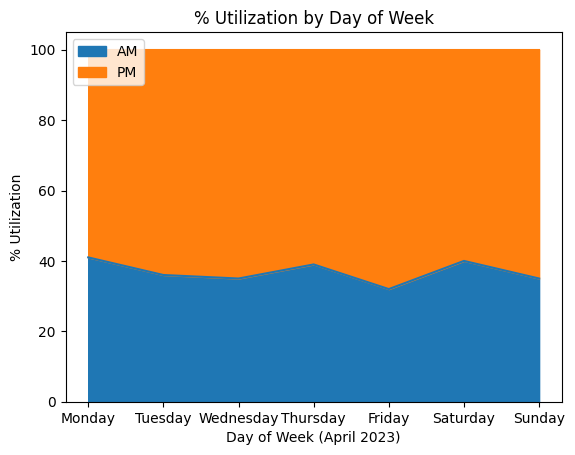

In [54]:
pivot3b = pivot3a.div(pivot3a.sum(axis=1), axis=0).round(2)
pivot3b.plot.area(stacked = True, title = '% Utilization by Day of Week', xlabel = 'Day of Week (April 2023)', ylabel = '% Utilization')
mp.yticks(np.arange(0, 1.1, step=0.2), ('0','20','40','60','80','100'))
mp.legend(title = '', loc = 2)
mp.savefig("cz_3b.jpg")
mp.show()

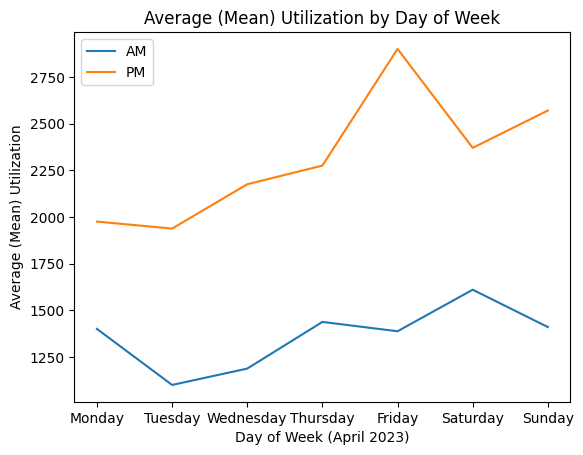

In [56]:
pivot3count = heatmap_data.pivot_table(index = 'Day_of_Week', columns = 'AM_PM', values = 'Date' , aggfunc = lambda x: len(x.unique())).fillna(0).astype(int)
pivot3count = pivot3count.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
pivot3count = pivot3count[['AM', 'PM']]
pivot3c = pivot3a.div(pivot3count).round(2)
pivot3c = pivot3c.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
pivot3c.plot(title = 'Average (Mean) Utilization by Day of Week', xlabel = 'Day of Week (April 2023)', ylabel = 'Average (Mean) Utilization')
mp.legend(title = '', loc = 2)
# mp.savefig("cz_3c.jpg")
mp.show()

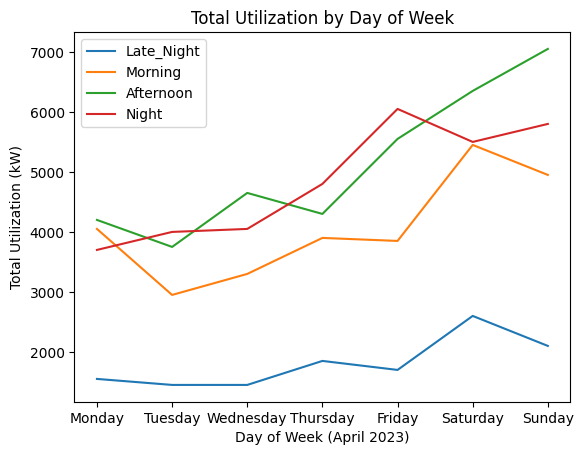

In [72]:
pivot4a = heatmap_data.pivot_table(index = 'Day_of_Week', columns = 'Time_of_Day', values = 'Unit_Consumption' , aggfunc = 'sum').fillna(0).astype(int)
pivot4a = pivot4a.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
pivot4a = pivot4a[['Late_Night', 'Morning', 'Afternoon', 'Night']]
pivot4a.plot(title = 'Total Utilization by Day of Week', xlabel = 'Day of Week (April 2023)', ylabel = 'Total Utilization (kW)')
mp.legend(title = '')
mp.savefig("cz_4a.jpg")
mp.show()

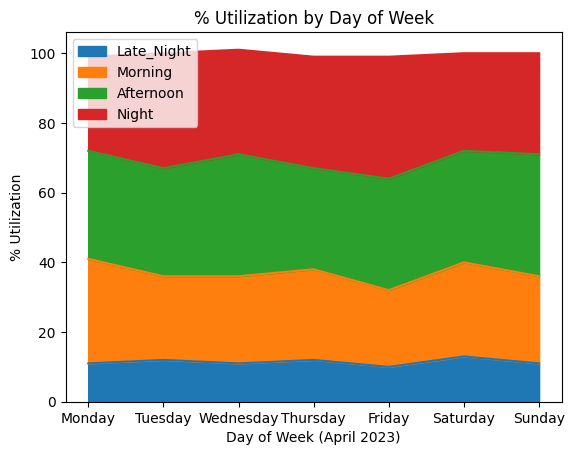

In [57]:
pivot4b = pivot4a.div(pivot4a.sum(axis=1), axis=0).round(2)
pivot4b.plot.area(stacked = True, title = '% Utilization by Day of Week', xlabel = 'Day of Week (April 2023)', ylabel = '% Utilization')
mp.yticks(np.arange(0, 1.1, step=0.2), ('0','20','40','60','80','100'))
mp.legend(title = '', loc = 2)
# mp.savefig("cz_4b.jpg")
mp.show()

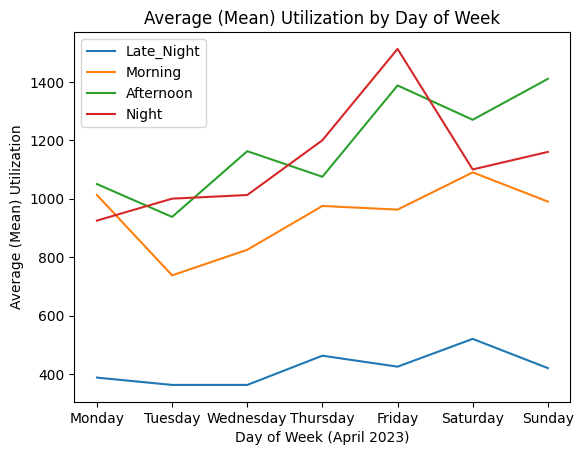

In [30]:
pivot4count = heatmap_data.pivot_table(index = 'Day_of_Week', columns = 'Time_of_Day', values = 'Date' , aggfunc = lambda x: len(x.unique())).fillna(0).astype(int)
pivot4count = pivot4count.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
pivot4count = pivot4count[['Late_Night', 'Morning', 'Afternoon', 'Night']]
pivot4c = pivot4a.div(pivot4count).round(2)
pivot4c.plot(title = 'Average (Mean) Utilization by Day of Week', xlabel = 'Day of Week (April 2023)', ylabel = 'Average (Mean) Utilization')
mp.legend(title = '')
# mp.savefig("cz_4c.jpg")
mp.show()

#### By Hour

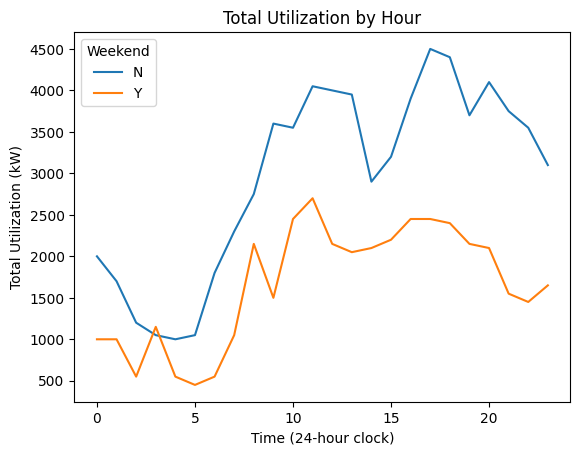

In [74]:
pivot5a = heatmap_data.pivot_table(index = 'Hour', columns = 'Weekend', values = 'Unit_Consumption' , aggfunc = 'sum').fillna(0).astype(int)
pivot5a.plot(title = 'Total Utilization by Hour', xlabel = 'Time (24-hour clock)', ylabel = 'Total Utilization (kW)')
mp.legend(title = 'Weekend')
mp.savefig("cz_5a.jpg")
mp.show()

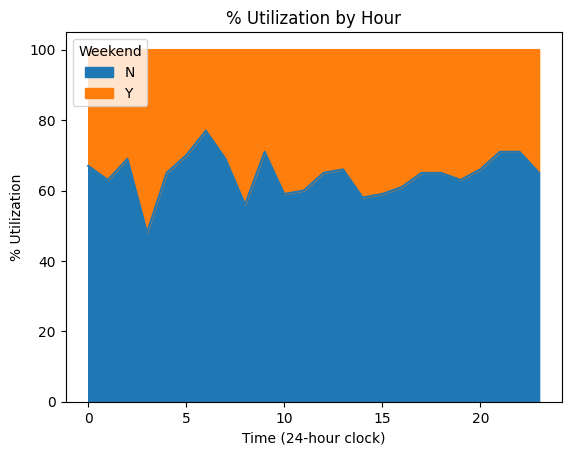

In [58]:
pivot5b = pivot5a.div(pivot5a.sum(axis=1), axis=0).round(2)
pivot5b.plot.area(stacked = True, title = '% Utilization by Hour', xlabel = 'Time (24-hour clock)', ylabel = '% Utilization')
mp.yticks(np.arange(0, 1.1, step=0.2), ('0','20','40','60','80','100'))
mp.legend(title = 'Weekend',loc = 2)
# mp.savefig("cz_5b.jpg")
mp.show()

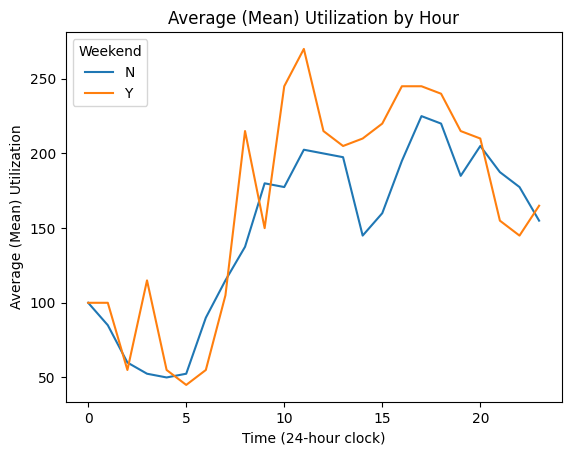

In [59]:
pivot5c = heatmap_data.pivot_table(index = 'Hour', columns = 'Weekend', values = 'Unit_Consumption' , aggfunc = 'mean').fillna(0).round(2)
pivot5c.plot(title = 'Average (Mean) Utilization by Hour', xlabel = 'Time (24-hour clock)', ylabel = 'Average (Mean) Utilization')
mp.legend(title = 'Weekend', loc = 2)
# mp.savefig("cz_5c.jpg")
mp.show()

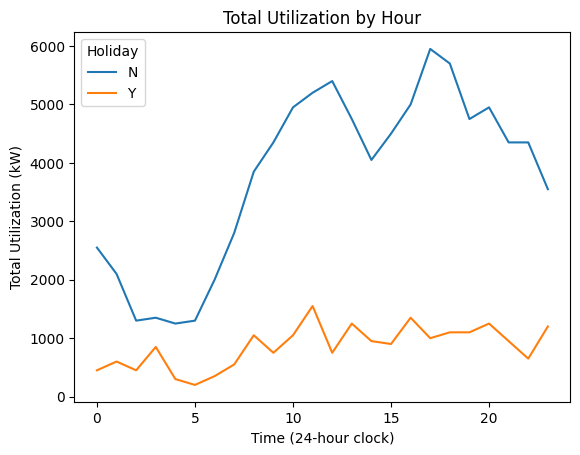

In [75]:
pivot6a = heatmap_data.pivot_table(index = 'Hour', columns = 'Holiday', values = 'Unit_Consumption' , aggfunc = 'sum').fillna(0).astype(int)
pivot6a.plot(title = 'Total Utilization by Hour', xlabel = 'Time (24-hour clock)', ylabel = 'Total Utilization (kW)')
mp.legend(title = 'Holiday', loc = 2)
mp.savefig("cz_6a.jpg")
mp.show()

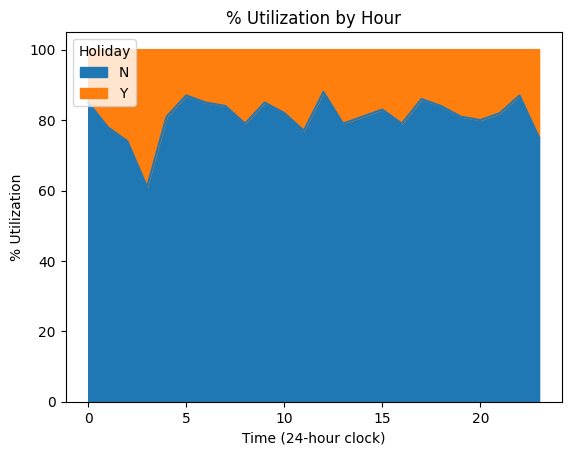

In [61]:
pivot6b = pivot6a.div(pivot6a.sum(axis=1), axis=0).round(2)
pivot6b.plot.area(stacked = True, title = '% Utilization by Hour', xlabel = 'Time (24-hour clock)', ylabel = '% Utilization')
mp.yticks(np.arange(0, 1.1, step=0.2), ('0','20','40','60','80','100'))
mp.legend(title = 'Holiday', loc = 2)
mp.savefig("cz_6b.jpg")
mp.show()

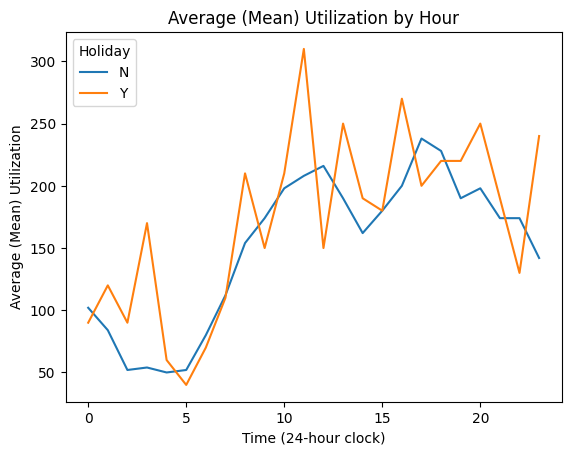

In [62]:
pivot6c = heatmap_data.pivot_table(index = 'Hour', columns = 'Holiday', values = 'Unit_Consumption' , aggfunc = 'mean').fillna(0).round(2)
pivot6c.plot(title = 'Average (Mean) Utilization by Hour', xlabel = 'Time (24-hour clock)', ylabel = 'Average (Mean) Utilization')
mp.legend(title = 'Holiday', loc = 2)
# mp.savefig("cz_6c.jpg")
mp.show()

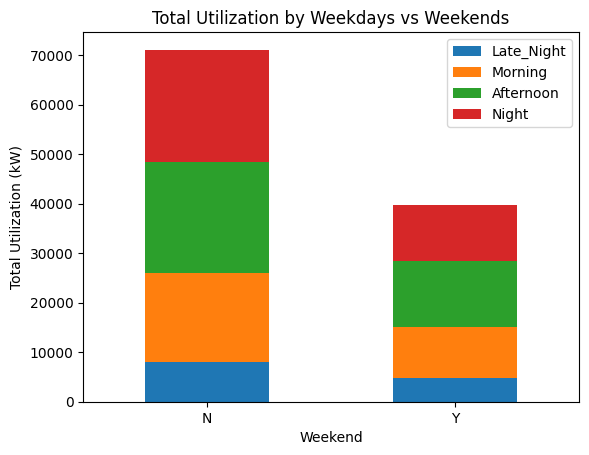

In [79]:
pivot7a = heatmap_data.pivot_table(index = 'Weekend', columns = 'Time_of_Day', values = 'Unit_Consumption' , aggfunc = 'sum').fillna(0).astype(int)
# pivot7a = pivot4count.reindex(['Y', 'N'])
pivot7a = pivot7a[['Late_Night', 'Morning', 'Afternoon', 'Night']]
pivot7a.plot(kind = 'bar',stacked = True, title = 'Total Utilization by Weekdays vs Weekends', xlabel = 'Weekend', ylabel = 'Total Utilization (kW)')
mp.legend(title = '')
mp.xticks(rotation = 0)
mp.savefig("cz_7a.jpg")
mp.show()

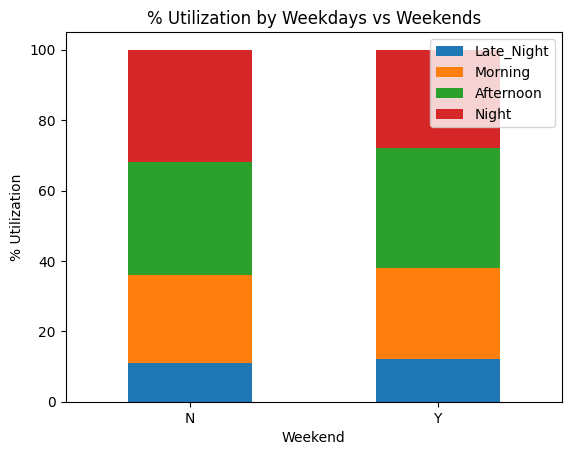

In [80]:
pivot7b = pivot7a.div(pivot7a.sum(axis=1), axis=0).round(2)
pivot7b.plot(kind = 'bar',stacked = True, title = '% Utilization by Weekdays vs Weekends', xlabel = 'Weekend', ylabel = '% Utilization')
mp.legend(title = '')
mp.xticks(rotation = 0)
mp.yticks(np.arange(0, 1.1, step=0.2), ('0','20','40','60','80','100'))
mp.savefig("cz_7b.jpg")
mp.show()

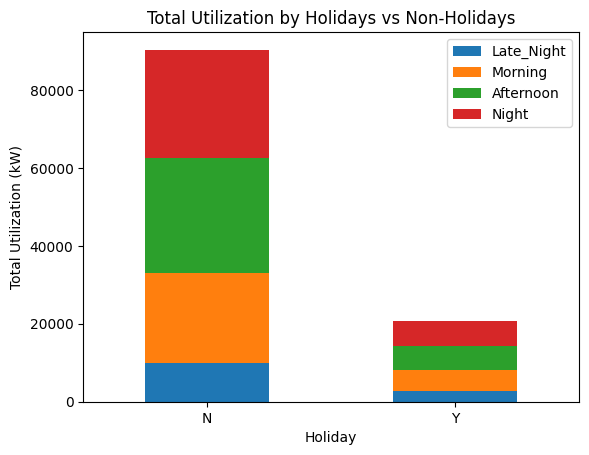

In [81]:
pivot8a = heatmap_data.pivot_table(index = 'Holiday', columns = 'Time_of_Day', values = 'Unit_Consumption' , aggfunc = 'sum').fillna(0).astype(int)
# pivot8a = pivot4count.reindex(['Y', 'N'])
pivot8a = pivot8a[['Late_Night', 'Morning', 'Afternoon', 'Night']]
pivot8a.plot(kind = 'bar',stacked = True, title = 'Total Utilization by Holidays vs Non-Holidays', xlabel = 'Holiday', ylabel = 'Total Utilization (kW)')
mp.legend(title = '')
mp.xticks(rotation = 0)
mp.savefig("cz_8a.jpg")
mp.show()

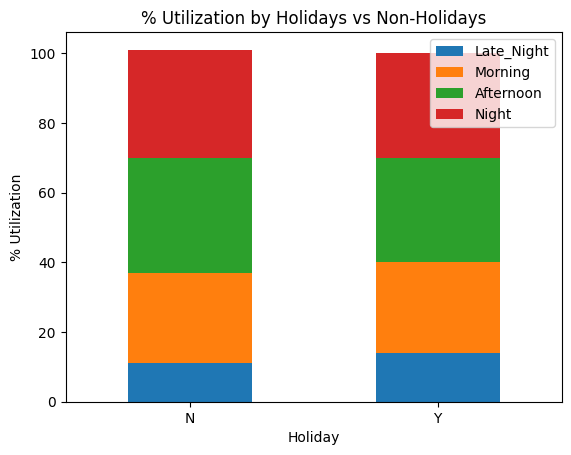

In [82]:
pivot8b = pivot8a.div(pivot8a.sum(axis=1), axis=0).round(2)
pivot8b.plot(kind = 'bar',stacked = True, title = '% Utilization by Holidays vs Non-Holidays', xlabel = 'Holiday', ylabel = '% Utilization')
mp.legend(title = '')
mp.xticks(rotation = 0)
mp.yticks(np.arange(0, 1.1, step=0.2), ('0','20','40','60','80','100'))
mp.savefig("cz_8b.jpg")
mp.show()

## Appendix

In [41]:
# def generate_legend(heatmap, l_cell_size, l_offset_x, l_offset_y, l_start, l_end):
#     cell_count = (h - l_offset_y[0] - l_offset_y[1])/l_cell_size[1]
#     step_size = (l_end - l_start)/cell_count
#     i = l_start + step_size/2

#     values = []
#     while(i < l_end):
#         values.append(i)
#         i = i + step_size
#     return values

In [42]:
# legend = pd.DataFrame(generate_legend(heatmap, l_cell_size, l_offset_x, l_offset_y, l_start, l_end))
# legend.index = [x for x in range(0, 501, 50)] #Changing to reflect unit consumption
# legend.head(11)